## GEO 885

In [1]:
from load_data import TrafficAxis, Accident

C:\Users\wlq92\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\wlq92\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
traffic_file_path = "C:/Users/wlq92/Desktop/UZH/FS 2024/Geo 885 Project/traffic_axis_json/data/"
traffic_data = TrafficAxis(traffic_file_path).get_data()
traffic_data = TrafficAxis(traffic_file_path).formatting_time(traffic_data)

In [3]:
T30 = TrafficAxis(traffic_file_path).speed_zone(traffic_data, "T30")
T20 = TrafficAxis(traffic_file_path).speed_zone(traffic_data, "T20")
T50 = TrafficAxis(traffic_file_path).speed_zone(traffic_data, "T50")

In [4]:
accident_path = "C:/Users/wlq92/Desktop/UZH/FS 2024/Geo 885 Project/"
accident = Accident(accident_path).get_data()
accident = Accident(accident_path).organize(accident)

In [5]:
from data_processing import TrafficBuffer, Intersect, FormatAccident

In [6]:
buffer_T30 = TrafficBuffer(T30).buffering()
buffer_T20 = TrafficBuffer(T20).buffering()
buffer_T50 = TrafficBuffer(T50).buffering()
buffer_T30.head()

,geometry,implemented_YYYYMM
76,"POLYGON ((954537.204 6003884.351, 954535.349 6...",202203
107,"POLYGON ((951351.712 6009279.037, 951351.254 6...",201411
120,"POLYGON ((944283.861 6003368.704, 944283.241 6...",201809
121,"POLYGON ((944059.129 6003207.799, 944058.737 6...",201809
122,"POLYGON ((944184.929 6003294.044, 944178.305 6...",201809


In [7]:
accident_T30 = Intersect(buffer_T30, accident).buffer_join()
accident_T20 = Intersect(buffer_T20, accident).buffer_join()
accident_T50 = Intersect(buffer_T50, accident).buffer_join()

In [8]:
accident_T30_format = FormatAccident(accident_T30).implement_date()
T30_beforeimply = FormatAccident(accident_T30).calculate_before()
T30_afterimply = FormatAccident(accident_T30).calculate_after()

accident_T20_format = FormatAccident(accident_T20).implement_date()
T20_beforeimply = FormatAccident(accident_T20).calculate_before()
T20_afterimply = FormatAccident(accident_T20).calculate_after()

accident_T50_format = FormatAccident(accident_T50).implement_date()
T50_beforeimply = FormatAccident(accident_T50).calculate_before()
T50_afterimply = FormatAccident(accident_T50).calculate_after()

In [9]:
from accident_map import MapAccident

In [10]:
MapAccident(buffer_T30, T30_beforeimply, T30_afterimply).display_map()

In [20]:
from data_analyze import Categorize, T_Test, Involvement
import matplotlib.pyplot as plt
import numpy as np

In [15]:
category_analyze_T30 = Categorize(T30_beforeimply, T30_afterimply)

severity_before_numeric_T30 = category_analyze_T30.severity_before_numeric
severity_after_numeric_T30 = category_analyze_T30.severity_after_numeric

type_before_numeric_T30 = category_analyze_T30.type_before_numeric
type_after_numeric_T30 = category_analyze_T30.type_after_numeric

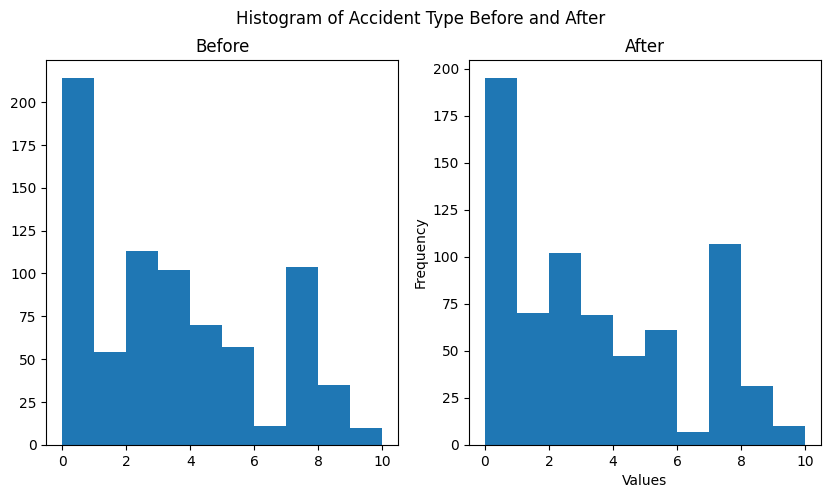

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(type_before_numeric_T30)
axes[0].set_title('Before')

axes[1].hist(type_after_numeric_T30)
axes[1].set_title('After')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.suptitle('Histogram of Accident Type Before and After')

plt.show()

In [16]:
T_Test(severity_before_numeric_T30, severity_after_numeric_T30).t_test()

T-Statistic_s: -0.5756877510648837
P-Value_s: 0.5649145509806441


In [17]:
T_Test(type_before_numeric_T30, type_after_numeric_T30).t_test()

T-Statistic_s: -0.030948690838873156
P-Value_s: 0.9753146686421484


In [26]:
involve_analyze_T30 = Involvement(T30_beforeimply, T30_afterimply)

bike_before_T30 = involve_analyze_T30.bike_before
bike_after_T30 = involve_analyze_T30.bike_after

pedestrian_before_T30 = involve_analyze_T30.pedestrian_before
pedestrian_after_T30 = involve_analyze_T30.pedestrian_after

In [30]:
category_analyze_bike_T30 = Categorize(bike_before_T30, bike_after_T30)
category_analyze_pedestrian_T30 = Categorize(pedestrian_before_T30, pedestrian_after_T30)

severity_before_bike_T30 = category_analyze_bike_T30.severity_before
severity_after_bike_T30 = category_analyze_bike_T30.severity_after

type_before_pedestrian_T30 = category_analyze_pedestrian_T30.type_before
type_after_pedestrian_T30 = category_analyze_pedestrian_T30.type_after

print(severity_before_bike_T30.value_counts())
print(severity_after_bike_T30.value_counts())

print(type_before_pedestrian_T30.value_counts())
print(type_after_pedestrian_T30.value_counts())

AccidentSeverityCategory_en
Accident with light injuries     71
Accident with property damage    26
Accident with severe injuries    15
Name: count, dtype: int64
AccidentSeverityCategory_en
Accident with light injuries     69
Accident with property damage    39
Accident with severe injuries    16
Name: count, dtype: int64
AccidentType_en
Accident involving pedestrian(s)              33
Accident with skidding or self-accident        3
Accident when overtaking or changing lanes     1
Name: count, dtype: int64
AccidentType_en
Accident involving pedestrian(s)           31
Accident with skidding or self-accident     1
Name: count, dtype: int64
